## EVALUACION MODULO 3

Promo 59

María del Rocío Sánchez Gálvez 


In [51]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Fase 1: Exploración y Limpieza
## Explotación

In [52]:
#Exploración Inicial:

df_activity = pd.read_csv("./files/Customer_Flight_Activity.csv")
df_history = pd.read_csv("./files/Customer_Loyalty_History.csv")

In [53]:
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [54]:
df_activity.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [55]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [56]:
df_history.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [57]:
df_activity.shape

(405624, 10)

In [58]:
df_history.shape

(16737, 16)

In [60]:
df_history.duplicated().sum()

np.int64(0)

In [61]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [62]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [63]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [64]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [65]:
df_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [66]:
df_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [67]:
df_activity['Dollar Cost Points Redeemed'].unique() #verifico que no es necesario cambiar el tipo de dato porque no haydecimales

array([ 0, 28, 30, 25, 36, 32, 24, 26, 37, 33, 35, 27, 31, 54, 42, 29, 38,
       34, 39, 55, 41, 49, 40, 48, 45, 53, 58, 44, 43, 46, 52, 47, 63, 57,
       62, 51, 50, 64, 56, 61, 65, 60, 68, 59, 66, 69, 67, 71, 70])

In [68]:
df_activity['Points Redeemed'].unique() #verifico que no es necesario borrarla ya que hay más valores además del 0

array([  0, 341, 364, 310, 445, 312, 343, 366, 389, 292, 447, 324, 456,
       409, 436, 327, 322, 291, 323, 300, 290, 309, 325, 386, 321, 363,
       340, 670, 443, 517, 444, 328, 344, 367, 313, 333, 293, 449, 297,
       455, 372, 356, 405, 381, 466, 419, 369, 352, 482, 335, 329, 305,
       415, 396, 317, 348, 314, 334, 350, 330, 318, 298, 420, 336, 471,
       680, 441, 353, 484, 301, 374, 417, 501, 299, 398, 307, 368, 306,
       347, 439, 395, 481, 337, 382, 426, 373, 399, 424, 326, 392, 438,
       467, 480, 448, 308, 400, 376, 375, 460, 339, 385, 611, 431, 320,
       362, 404, 442, 410, 361, 319, 435, 414, 464, 477, 315, 485, 370,
       421, 349, 371, 416, 496, 510, 667, 465, 434, 346, 487, 408, 500,
       360, 378, 345, 358, 479, 380, 411, 491, 505, 446, 425, 476, 393,
       418, 332, 401, 454, 303, 594, 506, 355, 302, 403, 379, 437, 561,
       483, 597, 391, 562, 342, 407, 490, 468, 488, 457, 365, 357, 463,
       388, 413, 351, 462, 440, 493, 507, 338, 377, 428, 525, 39

In [69]:
df_activity['Points Accumulated'].unique() #verifico que no es necesario cambiar el tipo de dato porque hay decimales

array([152.  , 203.  , 120.  , ...,  18.75, 601.  , 626.  ])

In [70]:
df_history['Cancellation Year'].unique() # hay nulos y decimales pero deberían ser enteros


array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [71]:
df_history['Cancellation Month'].unique() # hay nulos y decimales pero deberían ser enteros

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [72]:
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [73]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


## Limpieza de datos

In [74]:
df_activity_final = df_activity.copy()

In [75]:
df_history_final = df_history.copy()

In [76]:
df_history_final.drop(columns = ['Postal Code'], inplace = True)
df_history_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [77]:
# limpiar nombres de columnas y quitar espacios
df_history_final.columns = (
    df_history_final.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df_history_final.columns

Index(['loyalty_number', 'country', 'province', 'city', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [78]:
df_activity_final.columns = (
    df_activity_final.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df_activity_final.columns 

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [79]:
# Gestion de nulos y cambio de tipo de dato: mantengo nulos pero cambio el tipo de dato (de float a entero y utilizo el Int64 para mantener los nulos)
# Nulos en Cancellation Year (14670) y Cancellation Month (14670): puede ser que el cliente no se haya dado de baja, no los elimino.

df_history_final["cancellation_year"] = df_history_final["cancellation_year"].astype("Int64")
df_history_final["cancellation_month"] = df_history_final["cancellation_year"].astype("Int64")

In [80]:
# Hay nulos en Salary (4238): posiblemente el cliente no quiso dar ese dato o no se dispone de él, los mantengo.

In [81]:
# En salario hay valores negativos, primero miro porcentaje, como hay muy pocos los paso a nulos

# Total de filas y número de salarios negativos
total = len(df_history_final)
negativos = (df_history_final["salary"] < 0).sum()

# Porcentaje
porcentaje_negativos = negativos / total * 100

porcentaje_negativos


np.float64(0.119495728027723)

In [82]:
# Creo una columna llamada salary_clean con valores iguales a la columna 'salary' y después sustituyo los valores negativos por nulos (NaN)

df_history_final["salary_clean"] = df_history_final["salary"]

df_history_final.loc[
    df_history_final["salary_clean"] < 0,
    "salary_clean"
] = np.nan

df_history_final.columns


Index(['loyalty_number', 'country', 'province', 'city', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month', 'salary_clean'],
      dtype='object')

In [84]:
# % nulos
nulos = df_history_final.isnull().sum()/df_history_final.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

cancellation_year     87.650117
cancellation_month    87.650117
salary_clean          25.440640
salary                25.321145
city                   0.000000
loyalty_number         0.000000
province               0.000000
country                0.000000
marital_status         0.000000
education              0.000000
gender                 0.000000
loyalty_card           0.000000
enrollment_year        0.000000
enrollment_type        0.000000
clv                    0.000000
enrollment_month       0.000000
dtype: float64

In [85]:
df_union = pd.merge(df_activity_final, df_history_final, on='loyalty_number', how='left')
df_union.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_clean
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,<NA>,<NA>,92552.0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,<NA>,<NA>,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,<NA>,<NA>,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,<NA>,<NA>,63253.0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,<NA>,<NA>,91163.0


# Fase 2: Análisis Estadístico

## Análisis de variables numéricas:

### 1. Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.

In [86]:

df_union.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.0,550834.0,772194.0,999986.0
year,405624.0,2017.5,0.500001,2017.0,2017.0,2017.5,2018.0,2018.0
month,405624.0,6.5,3.452057,1.0,3.75,6.5,9.25,12.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
distance,405624.0,1208.880059,1433.15532,0.0,0.0,488.0,2336.0,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.0,50.0,239.0,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


Interpretación:
1. De la columna count se desprende que hay un total de 405.624 registros, pero el número de cancelaciones es inferior, por lo que hay un número inferior de clientes que se han dado de baja.
2. La media de reservas es de un 4,11, pero la mediana 1, por lo que debe de haber clientes que viajan mucho y otros que viajam muy poco. Lo mismo podríamos deducir por la mediana y la media del total de vuelos.
3. Respecto a los puntos canjeados por los clientes, dado que la desviación estándar es alta y se desvía mucho de la media, podemos decir que hay mucha dispersión y un comportamiento atípico en los clientes, por lo que muy pocos debes de haber usado los puntos.
4. De la fila clv podemos concluir que al ser la media superior a la mediana, debe de haber unos pocos clientes que son atípicos pero muy rentables.

In [87]:
# Moda (.select_dtypes para seleccionar columnas según el tipo de dato que indiquemos="number")

df_union.select_dtypes(include="number").mode().iloc[0]


loyalty_number                 678205.0
year                             2017.0
month                               1.0
flights_booked                      0.0
flights_with_companions             0.0
total_flights                       0.0
distance                            0.0
points_accumulated                  0.0
points_redeemed                     0.0
dollar_cost_points_redeemed         0.0
salary                         101933.0
clv                             3873.65
enrollment_year                  2018.0
enrollment_month                    5.0
cancellation_year                2018.0
cancellation_month               2018.0
salary_clean                   101933.0
Name: 0, dtype: Float64

Interpretación:
1. Es llamativo que haya valores '0' en muchas columnas, eso puede deberse a que, por las columnas que son, hubo un timpo grande que no reservaran nada.
2. El año que más clientes se inscribieron coincide con el de cancelaciones, el 2018.
3. La mayoría de reservas se hicieron es en el 2017 y en el mes en enero.
4. Los clientes que más vuelan son los que tienen un salario alto.

In [ ]:
# Rango
(df_union.select_dtypes(include="number").max() -  df_union.select_dtypes(include="number").min())


loyalty_number                 899968.0
year                                1.0
month                              11.0
flights_booked                     21.0
flights_with_companions            11.0
total_flights                      32.0
distance                         6293.0
points_accumulated                676.5
points_redeemed                   876.0
dollar_cost_points_redeemed        71.0
salary                         465714.0
clv                            81427.37
enrollment_year                     6.0
enrollment_month                   11.0
cancellation_year                   5.0
cancellation_month                  5.0
salary_clean                   391619.0
dtype: Float64

Interpretación: De la columna CLV podemos confirmar lo comentado anteriormente, hay mucha diferencia entre los clientes de 'alto valor' y los que aportan menos. De igual modo reforzamos la teoría de que hay muy pocos clientes que usen los puntos de fidelidad.

In [89]:
# Varianza 
df_union.select_dtypes(include="number").var()


loyalty_number                 67047482837.47628
year                                    0.250001
month                                  11.916696
flights_booked                         27.306042
flights_with_companions                 4.313386
total_flights                          42.526407
distance                          2053934.170655
points_accumulated                  21491.510583
points_redeemed                     15746.748573
dollar_cost_points_redeemed           103.023267
salary                         1224449407.473468
clv                              47109881.539759
enrollment_year                         3.918133
enrollment_month                       11.558409
cancellation_year                       1.916385
cancellation_month                      1.916385
salary_clean                   1205056152.385545
dtype: Float64

### 2. Identificación de valores atípicos en las variables numéricas.

In [90]:
# Cáculculo de outliers

col_numerica = df_union.select_dtypes(include="number")



Q1 = col_numerica.quantile(0.25)
Q3 = col_numerica.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = ( (col_numerica < limite_inferior) | (col_numerica > limite_superior) )



print(f"Número de outliers: {outliers.shape[0]}")

Número de outliers: 405624


In [91]:
outliers.sum().sort_values(ascending=False) # Número de outliers por variable




flights_with_companions        71560
clv                            36192
dollar_cost_points_redeemed    24181
points_redeemed                24181
salary                         13320
salary_clean                   12840
total_flights                   1984
flights_booked                   528
distance                         146
points_accumulated               127
loyalty_number                     0
month                              0
year                               0
enrollment_year                    0
enrollment_month                   0
cancellation_year                  0
cancellation_month                 0
dtype: Int64

In [92]:
(outliers.sum() / len(df_union) * 100).round(2) # porcentaje redondeado a 2 decimales)


loyalty_number                   0.0
year                             0.0
month                            0.0
flights_booked                  0.13
flights_with_companions        17.64
total_flights                   0.49
distance                        0.04
points_accumulated              0.03
points_redeemed                 5.96
dollar_cost_points_redeemed     5.96
salary                          3.28
clv                             8.92
enrollment_year                  0.0
enrollment_month                 0.0
cancellation_year                0.0
cancellation_month               0.0
salary_clean                    3.17
dtype: Float64

Interpretación: hay casi un 9% de clientes vips y sólo un 17,64 de clientes suelen ir acompañados que posiblemente sean familiares. Sólo un 6% utilizan los puntos de fidelidad.

### 3. Análisis de correlación entre variables numéricas.

In [93]:

correlacion = df_union.select_dtypes(include="number").corr(method="pearson")
correlacion

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_clean
loyalty_number,1.000000e+00,-1.503377e-12,-6.976526e-15,-0.002766,-0.003373,-0.003290,-0.002302,-0.002315,0.000492,0.000486,1.473708e-02,-1.072427e-03,8.360517e-03,4.673399e-03,9.071054e-03,9.071054e-03,1.317340e-02
year,-1.503377e-12,1.000000e+00,-4.736123e-12,0.044510,0.021615,0.042550,0.056140,0.075208,0.017633,0.017624,1.295501e-14,1.422805e-15,4.076595e-12,1.949887e-14,-9.819310e-13,-9.819310e-13,2.689523e-13
month,-6.976526e-15,-4.736123e-12,1.000000e+00,0.082133,0.064492,0.086353,0.076345,0.054178,0.019408,0.019315,1.276233e-14,3.830294e-16,6.641712e-13,-5.550505e-15,-7.567019e-13,-7.567019e-13,1.087726e-14
flights_booked,-2.765738e-03,4.451043e-02,8.213330e-02,1.000000,0.502500,0.961344,0.767457,0.760279,0.188232,0.188242,5.803686e-03,-2.963577e-03,-1.534545e-01,-3.152846e-02,3.149474e-01,3.149474e-01,5.488997e-03
flights_with_companions,-3.372574e-03,2.161493e-02,6.449206e-02,0.502500,1.000000,0.721136,0.517979,0.511090,0.334325,0.334385,2.493185e-03,-2.583089e-03,-9.701219e-02,-1.964384e-02,2.197599e-01,2.197599e-01,1.943399e-03
total_flights,-3.290302e-03,4.255050e-02,8.635348e-02,0.961344,0.721136,1.000000,0.779935,0.771989,0.257307,0.257334,5.445140e-03,-3.197399e-03,-1.538608e-01,-3.152018e-02,3.153536e-01,3.153536e-01,5.017888e-03
distance,-2.301709e-03,5.614031e-02,7.634481e-02,0.767457,0.517979,0.779935,1.000000,0.994564,0.224261,0.224283,8.041642e-03,-4.252336e-03,-1.652630e-01,-3.441586e-02,3.293646e-01,3.293646e-01,7.515239e-03
points_accumulated,-2.314766e-03,7.520848e-02,5.417842e-02,0.760279,0.511090,0.771989,0.994564,1.000000,0.223230,0.223264,7.867267e-03,-1.074624e-03,-1.646450e-01,-3.389278e-02,3.312216e-01,3.312216e-01,7.341724e-03
points_redeemed,4.915334e-04,1.763278e-02,1.940776e-02,0.188232,0.334325,0.257307,0.224261,0.223230,1.000000,0.999972,2.844708e-03,-3.038249e-04,-4.786677e-02,-8.689322e-03,1.121894e-01,1.121894e-01,2.413240e-03
dollar_cost_points_redeemed,4.855469e-04,1.762408e-02,1.931472e-02,0.188242,0.334385,0.257334,0.224283,0.223264,0.999972,1.000000,2.839249e-03,-2.772702e-04,-4.791541e-02,-8.692341e-03,1.122613e-01,1.122613e-01,2.406097e-03


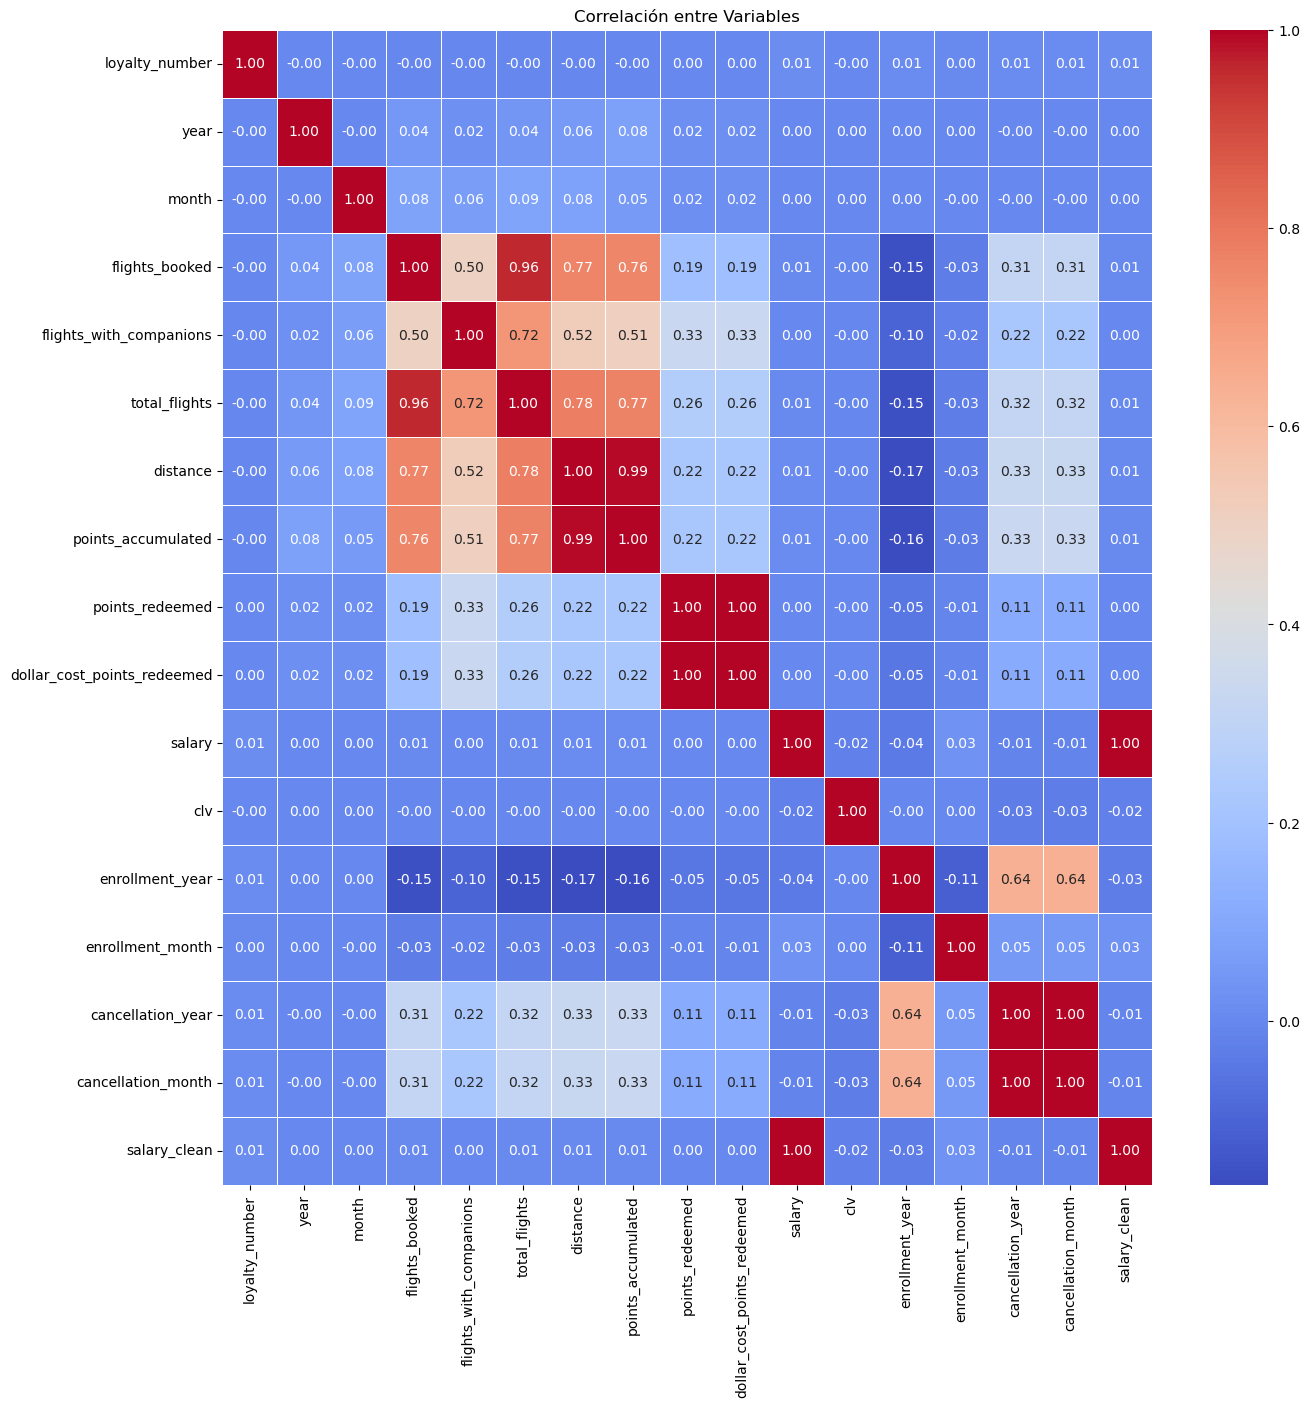

In [94]:
# Visualización de la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlación entre Variables')

plt.show()

## 2. Análisis de variables categóricas:

### 1. Distribución de frecuencias de las variables categóricas relevantes.

In [95]:
# 1. Identifico las columnas categóricas (tipo object o category)
cols_categoricas = df_union.select_dtypes(include=['object', 'category']).columns


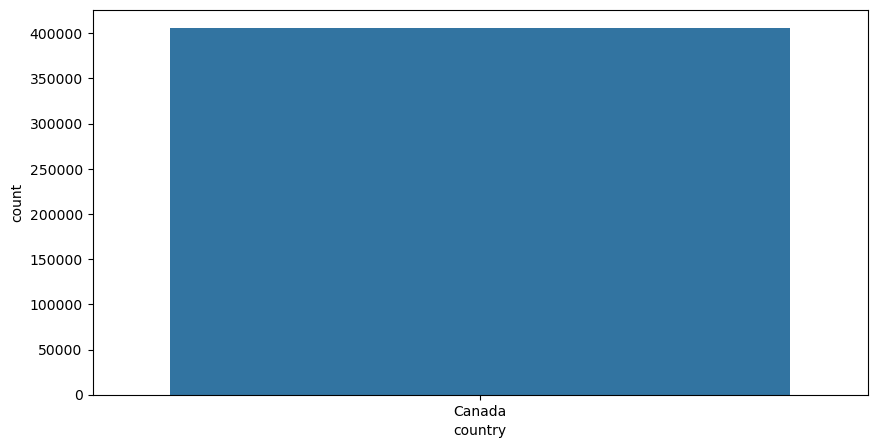

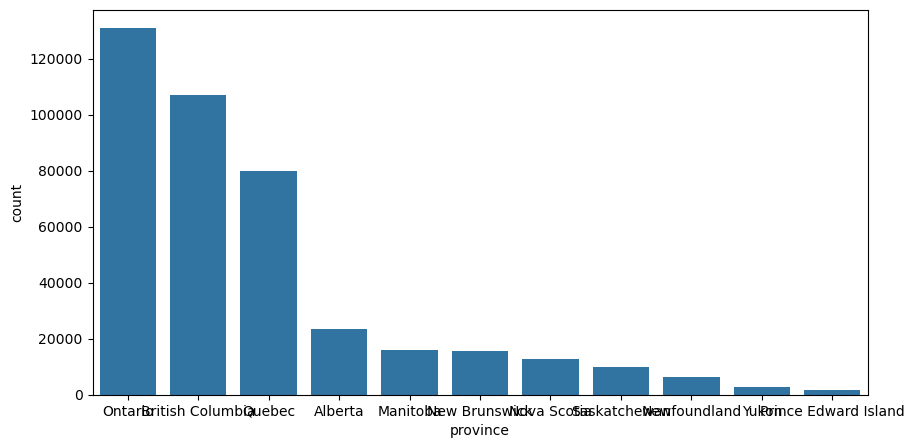

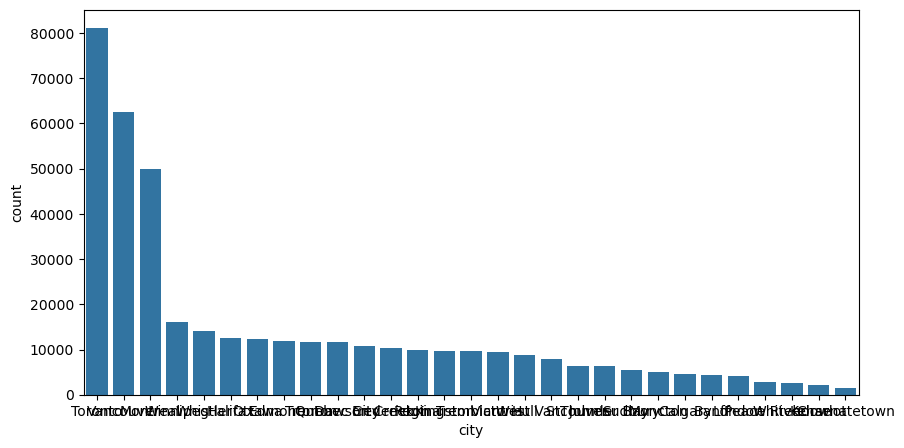

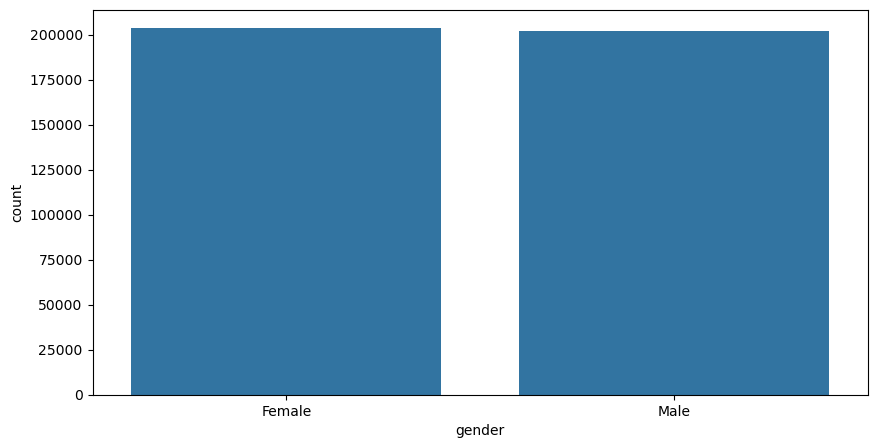

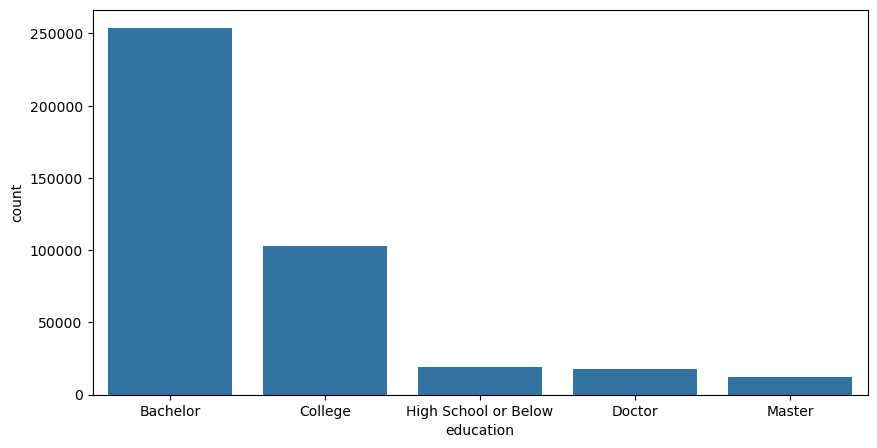

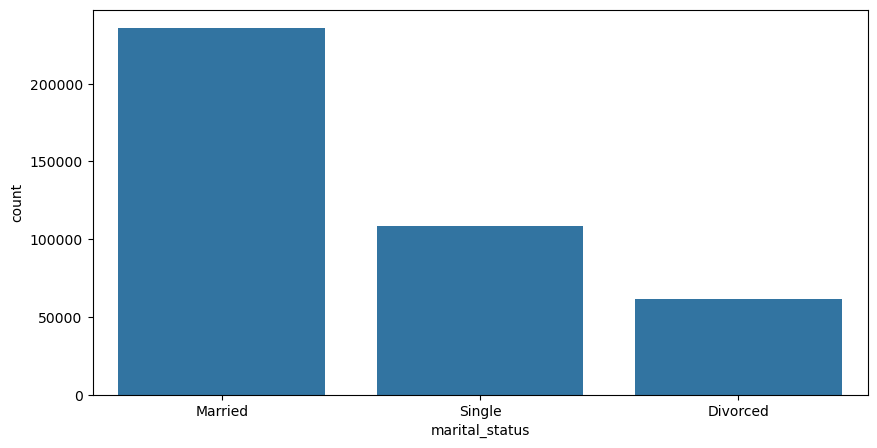

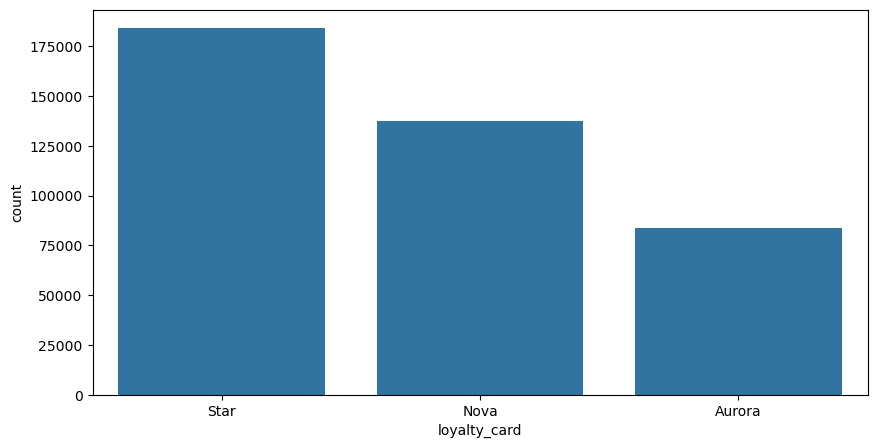

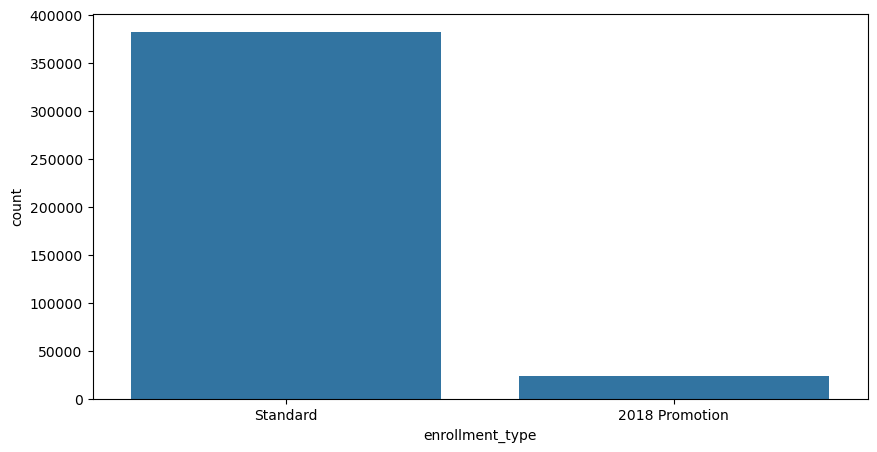

In [ ]:
# 2. Creamos un bucle para graficar cada una
for i in cols_categoricas:
    plt.figure(figsize=(10, 5))
    # Ordenamos por frecuencia 
    sns.countplot(data=df_union, x=i, order=df_union[i].value_counts().index)
    
    

## Fase 3: Visualización

In [98]:
df_union.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month', 'salary_clean'],
      dtype='object')

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [105]:
vuelos_mensuales = df_union.groupby("month")["flights_booked"].sum().reset_index()
print(vuelos_mensuales)

    month  flights_booked
0       1           96936
1       2           96334
2       3          131199
3       4          112511
4       5          142170
5       6          173242
6       7          193431
7       8          169204
8       9          136379
9      10          129461
10     11          122250
11     12          166047


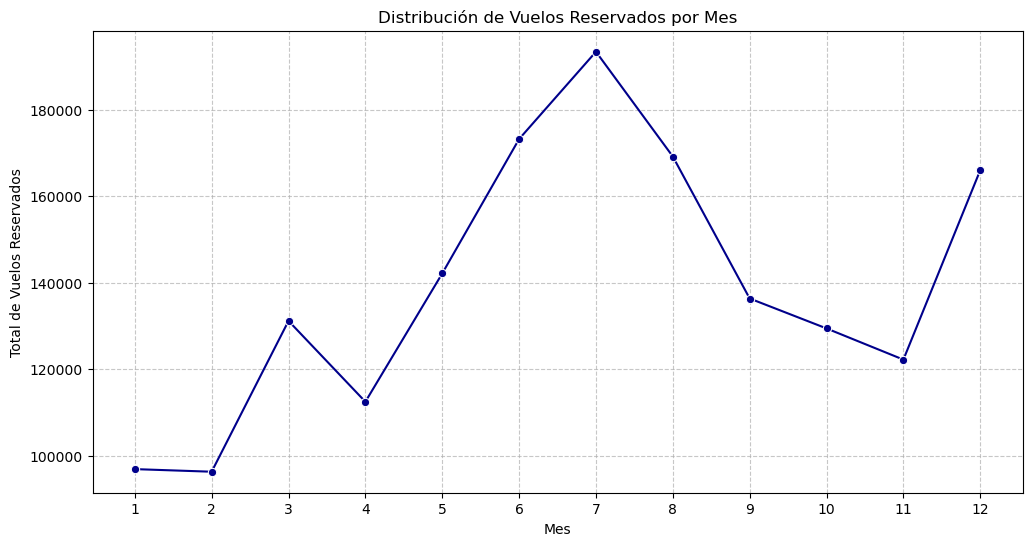

In [106]:
# 2. Creo la figura
plt.figure(figsize=(12, 6))

# 3. Dibujo del gráfico 
sns.lineplot(data=vuelos_mensuales, x="month", y="flights_booked", marker="o", color="darkblue")

# 4. Personalización
plt.title("Distribución de Vuelos Reservados por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Vuelos Reservados")
plt.xticks(range(1, 13))  
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

Interpretación: en julio es cuando más reservas hay y en enero es cuando menos reservas se realizan.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [ ]:
# Primero busco la correlación entre ambas variables
correlacion_vuelos_puntos = df_union['distance'].corr(df_union['points_accumulated'])
print(f"El coeficiente de correlación de Pearson es: {correlacion_vuelos_puntos:.2f}")

El coeficiente de correlación de Pearson es: 0.99


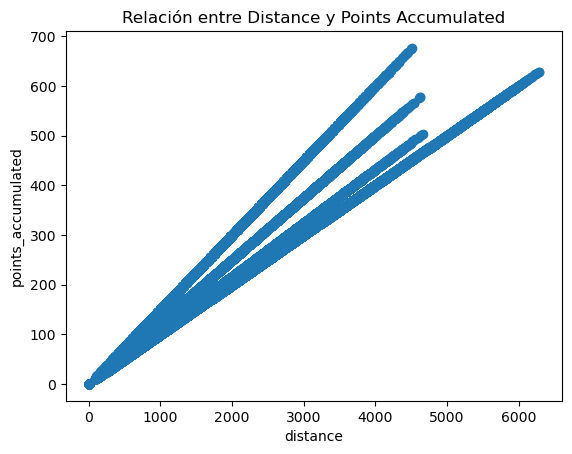

In [ ]:
# Gráfico de dispersión
plt.scatter(df_union["distance"], df_union["points_accumulated"])
plt.xlabel("distance")
plt.ylabel("points_accumulated")
plt.title("Relación entre Distance y Points Accumulated")
plt.show()

Interpretación: Existe una correlación fuerte dado que el valor absoluto del coeficiente de correlación supera el 0.7, por tanto, concluimos que existe relación entre ambas variables y una relación lineal positiva, cuanta más distancia de vuelo haya, más puntos recibirá el cliente.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
df_clientes_unicos = df_union.drop_duplicates(subset="loyalty_number")
clientes_provincias = df_clientes_unicos["province"].value_counts()
clientes_provincias

province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\1618690783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clientes_unicos, x="province", palette="viridis", order=df_clientes_unicos["province"].value_counts().index)


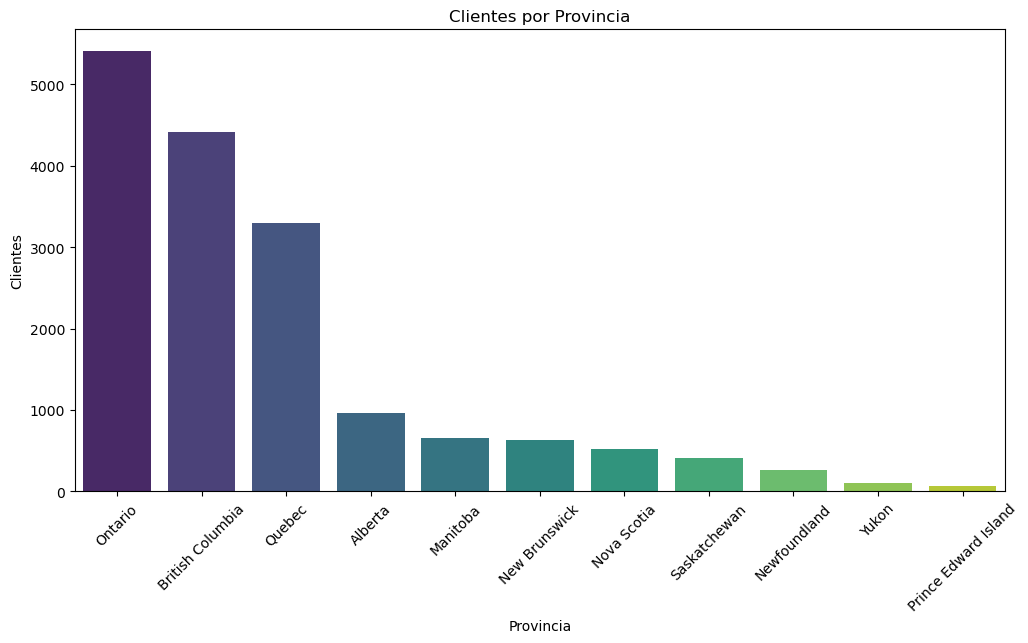

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clientes_unicos, x="province", palette="viridis", order=df_clientes_unicos["province"].value_counts().index) 
plt.title("Clientes por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Clientes")
plt.xticks(rotation=45)
plt.show()

Interpretación: Ontario es la provicia donde más clientes hay, seguidamente British Columbia y Quebec. En el resto de provincias viven muy pocos clientes, casi ninguno en Prince Edward Island.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

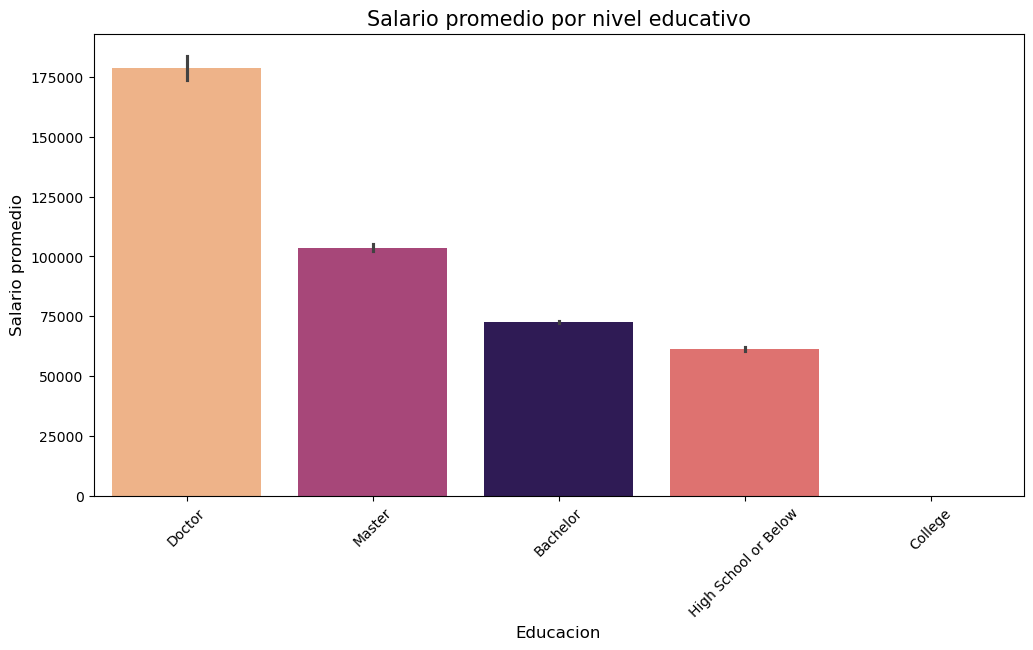

In [ ]:
plt.figure(figsize=(12, 6))


sns.barplot(
    data=df_clientes_unicos, 
    x="education", 
    y="salary_clean", 
    palette="magma",
    hue="education",
    legend=False,
   
    order=df_clientes_unicos.groupby("education")["salary_clean"].mean().sort_values(ascending=False).index
)


plt.title("Salario promedio por nivel educativo", fontsize=15)
plt.xlabel("Educacion", fontsize=12)
plt.ylabel("Salario promedio", fontsize=12)
plt.xticks(rotation=45)

plt.show()

Interpretación: Cuanto más nivel educativo tiene un cliente, mayor es su salario. No obstante, las barras de error nos indican que aquellos que tienen un doctorado tienen mayor diversidad entre sus salarios, casi no existe esta diversidad en el caso de los clientes que estudiaron bachiller o se quedaron en el instituto.
Asimismo, podemos observar que los que van al colegio no son asalariados.

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
conteos_lcard = df_clientes_unicos["loyalty_card"].value_counts()
conteos_lcard

loyalty_card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

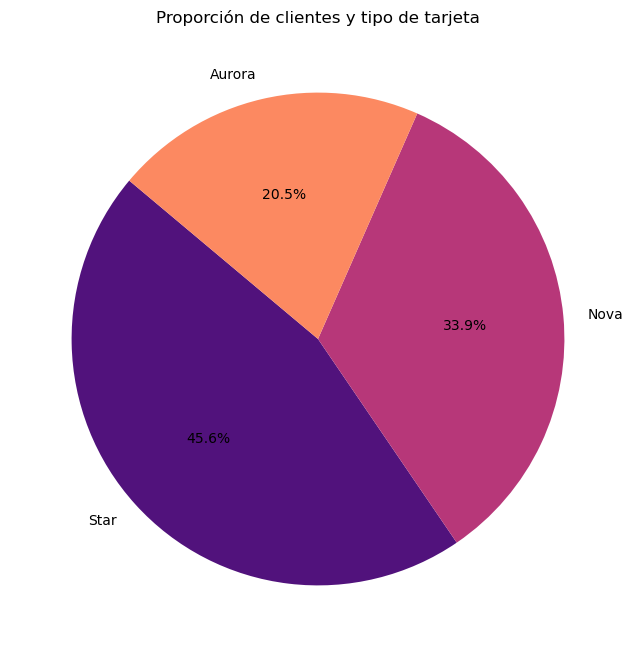

In [ ]:

plt.figure(figsize=(8, 8))
plt.pie(
    conteos_lcard,                      
    labels = conteos_lcard.index,        #
    autopct = '%1.1f%%',          
    startangle = 140, 
    colors = sns.color_palette("magma", len(conteos_lcard)) 
)

plt.title("Proporción de clientes y tipo de tarjeta")
plt.show()

Interpretación: la tarjeta que más clientes tiene es la Star y predomina ya que la tienen casi la mitad de los clientes, le siguen la nova y la que menos clientes tienen es la tarjeta Aurora.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

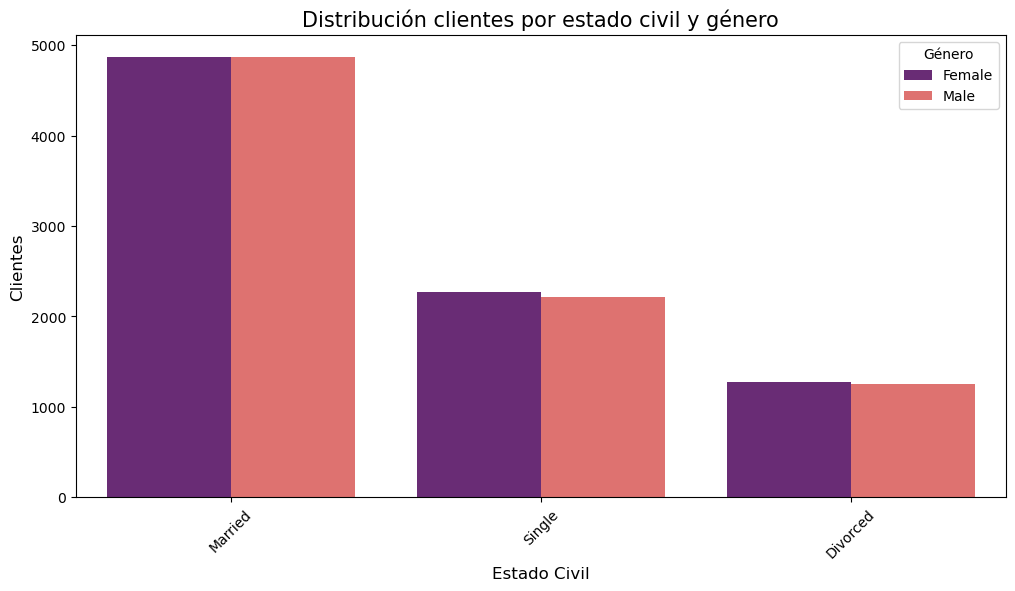

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_clientes_unicos, 
    x="marital_status", 
    hue="gender", 
    palette="magma",
    hue_order=df_clientes_unicos["gender"].value_counts().index 
)

plt.title("Distribución clientes por estado civil y género", fontsize=15)
plt.xlabel("Estado Civil", fontsize=12)
plt.ylabel("Clientes", fontsize=12)
plt.legend(title="Género")
plt.xticks(rotation=45)

plt.show()

Interpretación: Los clientes casados son los que más viajan y no hay diferencia de género. 
El siguiente grupo que más viaja es el de los solteros y, por último el de los divorciados. 
También podemos apreciar que en estos dos últimos estados civiles, coincide que las mujeres viajan más que los hombres.

## Fase 4: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


In [102]:
df_educacion_vuelos = df_union[['flights_booked', 'education']]

df_educacion_vuelos.head()

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [103]:
analisis_educacion_vuelos = df_educacion_vuelos.groupby('education')['flights_booked'].agg(['mean', 'std', 'count', 'min', 'max'])
analisis_educacion_vuelos


,mean,std,count,min,max
education,,,,,
Bachelor,4.091093,5.216995,253752,0,21
College,4.153012,5.242136,102672,0,21
Doctor,4.146281,5.250093,17856,0,21
High School or Below,4.155777,5.234551,19008,0,21
Master,4.184014,5.210294,12336,0,21


Interpretación: 

Promedio (Mean): los promedios no varían mucho, por lo que no se aprecia correlación entre educación y reservas.
Desviación Estándar (Std): Dado que es alta, podemos decir que dentro del mismo nivel educativo hay personas que viajan mucho y otras que viajan poco.

